In [ ]:
import sys
sys.path.insert(0, "/global/u1/p/prakharb/desilike-fkpt-dev")
sys.path.insert(0, "/global/u1/p/prakharb/fkpt")
import sys
sys.path.insert(0, "/global/u1/p/prakharb/isitgr_private")
import isitgr
print(isitgr.__file__)

In [1]:
import sys
# sys.path.insert(0, "/global/u1/p/prakharb/desilike-fkpt-dev")
# sys.path.insert(0, "/global/u1/p/prakharb/pyfkpt")
import sys
# sys.path.insert(0, "/global/u1/p/prakharb/isitgr_private")
import desilike, inspect
import pyfkpt
import isitgr
print(inspect.getfile(desilike))
print(inspect.getfile(pyfkpt))
print(inspect.getfile(isitgr))
print(isitgr.__file__)

/global/u1/p/prakharb/desilike-fkpt-dev/desilike/__init__.py
/global/u1/p/prakharb/fkpt/pyfkpt/__init__.py
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/isitgr/__init__.py
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/isitgr/__init__.py


In [2]:
import re
import os
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from desilike.jax import numpy as jnp
from desilike.jax import jit, interp1d
from desilike import jax

from desilike import plotting, utils, BaseCalculator
from desilike.theories.galaxy_clustering.base import BaseTheoryPowerSpectrumMultipolesFromWedges, BaseTheoryPowerSpectrumMultipoles
from desilike.theories.galaxy_clustering.full_shape import BasePTPowerSpectrumMultipoles, fkptPowerSpectrumMultipoles, BaseTracerPowerSpectrumMultipoles
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# from .base import BaseTheoryPowerSpectrumMultipoles, BaseTheoryCorrelationFunctionMultipoles, BaseTheoryCorrelationFunctionFromPowerSpectrumMultipoles
# from .power_template import DirectPowerSpectrumTemplate, StandardPowerSpectrumTemplate

In [3]:
from desilike.theories.galaxy_clustering.full_shape import DirectPowerSpectrumTemplate, KaiserTracerPowerSpectrumMultipoles, SimpleTracerPowerSpectrumMultipoles, FOLPSAXTracerPowerSpectrumMultipoles,fkptTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.parameter import ParameterCollection
from desilike import setup_logging
from desilike import parameter
from desilike.theories import Cosmoprimo
# from desilike_private.theories.galaxy_clustering.full_shape import FOLPSv2TracerPowerSpectrumMultipoles



In [4]:
z=0.3
from cosmoprimo.fiducial import DESI

cosmo2 = Cosmoprimo(engine='isitgr', MG_parameterization="muSigma", N_eff=3.046, m_ncdm=[])
cosmo2.init.params['mu0'] = dict(prior=dict(dist='uniform', limits=[-5., 5.]))  # add parameters
cosmo2.init.params.pop('m_ncdm')  # remove neutrino masses
cosmo2.init.params['mu0'].update(value=0.0,fixed=False)  # compute cosmology
# Store in a dictionary
h      = 0.6711
# h=0.73
ombh2  = 0.022
omch2  = 0.12
omnuh2 = 0.0
As     = 2e-9
ns     = 0.965
N_eff=3.046
cosmo_params = {
    "h": h,
    "omega_b": ombh2,
    "omega_cdm": omch2,
    "logA": np.log(1e10*As),
    "ns": ns,
}

for name, value in cosmo_params.items():
    if name in cosmo2.params:
        cosmo2.init.params[name].update(value=value)


k=np.linspace(0.001,0.3,50)
template2 = DirectPowerSpectrumTemplate(z=z, fiducial=DESI(),cosmo=cosmo2)
theory2 =  fkptTracerPowerSpectrumMultipoles(template=template2,prior_basis='standard',k=k,beyond_eds=False)
template2()
cosmo2._engine._camb_params
# theory.compute( )k_for_cov

# a,b,c=theory1()
# Define nuisance parameters
b1 = 1.70
b2 = -0.45
bs2  = -4/7 * (b1 - 1)
b3nl = 32/315 * (b1 - 1)
alpha0, alpha2, alpha4, ctilde = 3.0, -29.0, 0.0, 0.0
alpha0shot, alpha2shot, pshotp = 0.08, -8.0, 10000.0

b1 = 1.0
b2 = 0.0
bs2  = -4/7 * (b1 - 1)
b3nl = 32/315 * (b1 - 1)
alpha0, alpha2, alpha4, ctilde = 0.0,0.0, 0.0, 0.0
alpha0shot, alpha2shot, pshotp = 0.0, 0.0, 10000.0

# Store all nuisance parameters in a dict with names
nuis_params = {
    "b1": b1,
    "b2": b2,
    "bs2": bs2,
    "b3nl": b3nl,
    "alpha0": alpha0,
    "alpha2": alpha2,
    "alpha4": alpha4,
    "ctilde": ctilde,
    "alpha0shot": alpha0shot,
    "alpha2shot": alpha2shot,
}

# Update theory2.init.params
for name, value in nuis_params.items():
    if name in theory2.init.params:
        theory2.init.params[name].update(value=value)

# a,b,c=theory1()
d,e,f=theory2()
# template2()
# theory2.all_params
# cosmo2._engine._camb_params


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:25: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


/global/u1/p/prakharb/fkpt/pyfkpt/rsd.py
{'b1': array(1.), 'b2': array(0.), 'bs2': array(-0.), 'b3nl': array(0.), 'alpha0': array(0.), 'alpha2': array(0.), 'alpha4': array(0.), 'ctilde': array(0.), 'alpha0shot': array(0.), 'alpha2shot': array(0.), 'Om': 0.3152926645318688, 'PshotP': 10000.0, 'model': 'HDKI', 'mg_variant': 'mu_OmDE', 'mu0': array(0.), 'h': array(0.6711), 'z': array(0.3), 'nquadSteps': 300, 'chatty': 0, 'rescale_PS': False, 'use_beyond_eds_kernels': False}


In [ ]:
from desilike.emulators import EmulatedCalculator, Emulator, TaylorEmulatorEngine
emulator_filename = f'emulator_mu0.npy'

# if os.path.exists(emulator_filename):
#     print(f"FS emulator {i} already exists, loading it now")
#     emulator = EmulatedCalculator.load(emulator_filename)  
#     theories[i].init.update(pt=emulator)
# else:
    # print(f" Computing FS emulator {i}")
theory2.pt()
emulator = Emulator(theory2.pt, engine=TaylorEmulatorEngine(method='finite', order=4))
emulator.set_samples()
emulator.fit()
emulator.save(emulator_filename)
# theory2.init.update(pt=emulator.to_calculator())
# print('FS theories have been emulated successfully' if set_emulator else 'EMULATOR NOT ACTIVATED for FS; proceeding without emulation')


In [9]:
d

Array([ 4092.33624182, 19964.93352266, 25708.00767477, 25969.41224935,
       23523.76707285, 20221.16819446, 17157.77395315, 14792.98675164,
       13158.29807457, 12022.01548429, 11143.05503488, 10325.65924599,
        9457.77642984,  8532.32762162,  7622.608083  ,  6806.23250348,
        6140.50257453,  5634.06030115,  5269.52665561,  4998.72492978,
        4767.374621  ,  4544.98811802,  4311.78476492,  4064.55313113,
        3821.42510622,  3600.06110617,  3406.90543103,  3242.79610578,
        3108.25009063,  2997.37636751,  2900.30120482,  2807.36060027,
        2713.55133917,  2621.06671789,  2532.60832404,  2450.54829246,
        2375.60661289,  2307.08472762,  2244.30053107,  2186.6149841 ,
        2133.4059737 ,  2084.04032848,  2037.86437432,  1994.23095115,
        1952.5216502 ,  1912.16175435,  1872.62908787,  1833.45793493,
        1794.23910092,  1754.61708053], dtype=float64)

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#isitgr_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
#sys.path.insert(0,isitgr_path)
#import camb
#print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
import isitgr
from isitgr import model
print('Using CAMB-ISiTGR %s installed at %s'%(isitgr.__version__,os.path.dirname(isitgr.__file__)))
ombh2=0.022
omch2=0.12
mnu=0.00
omch2=mnu/93.14
h=0.6711
pars = isitgr.CAMBparams()
pars.set_cosmology(H0=67.11, ombh2=0.022, omch2=0.12, mnu=0.00, omk=0, tau=0.0544, nnu=3.046,
                  MG_parameterization="muSigma", mu0=0.0)
pars.InitPower.set_params(As=2.0e-9, ns=0.965, r=0)
pars.set_accuracy(AccuracyBoost=1)
pars.NonLinear = model.NonLinear_none
z=0.3
pars.set_matter_power(redshifts=[z], kmax=2)
results = isitgr.get_results(pars)
k_isitgr, _, Pk = results.get_matter_power_spectrum(minkh=0.001, maxkh=2, npoints=200)
Pk = Pk[0]
# Om     = (ombh2 + omch2 + omnuh2) / (h**2)
# base_common = dict(
#     z=z_pk, Om=Om, h=h,
#     b1=b1, b2=b2, bs2=bs2, b3nl=b3nl,
#     alpha0=alpha0, alpha2=alpha2, alpha4=alpha4, ctilde=ctilde,
#     PshotP=pshotp, alpha0shot=alpha0shot, alpha2shot=alpha2shot,
#     nquadSteps=300, chatty=0,
#     model="HDKI",
#     mg_variant="mu_OmDE",
# )
# pE = deepcopy(base_common); pE["rescale_PS"]=False; pE["use_beyond_eds_kernels"]=False
# tE = pyfkpt.compute_multipoles(k=k_isitgr, pk=Pk, **pE)
# kE, P0E, P2E, P4E = pyfkpt.rsd_multipoles(k=k_isitgr, nuis=nuis, z=z_pk, Om=Om, ap=False, tables=tE)
# print(kE)

Using CAMB-ISiTGR 1.0.5 installed at /global/u1/p/prakharb/isitgr_private/isitgr


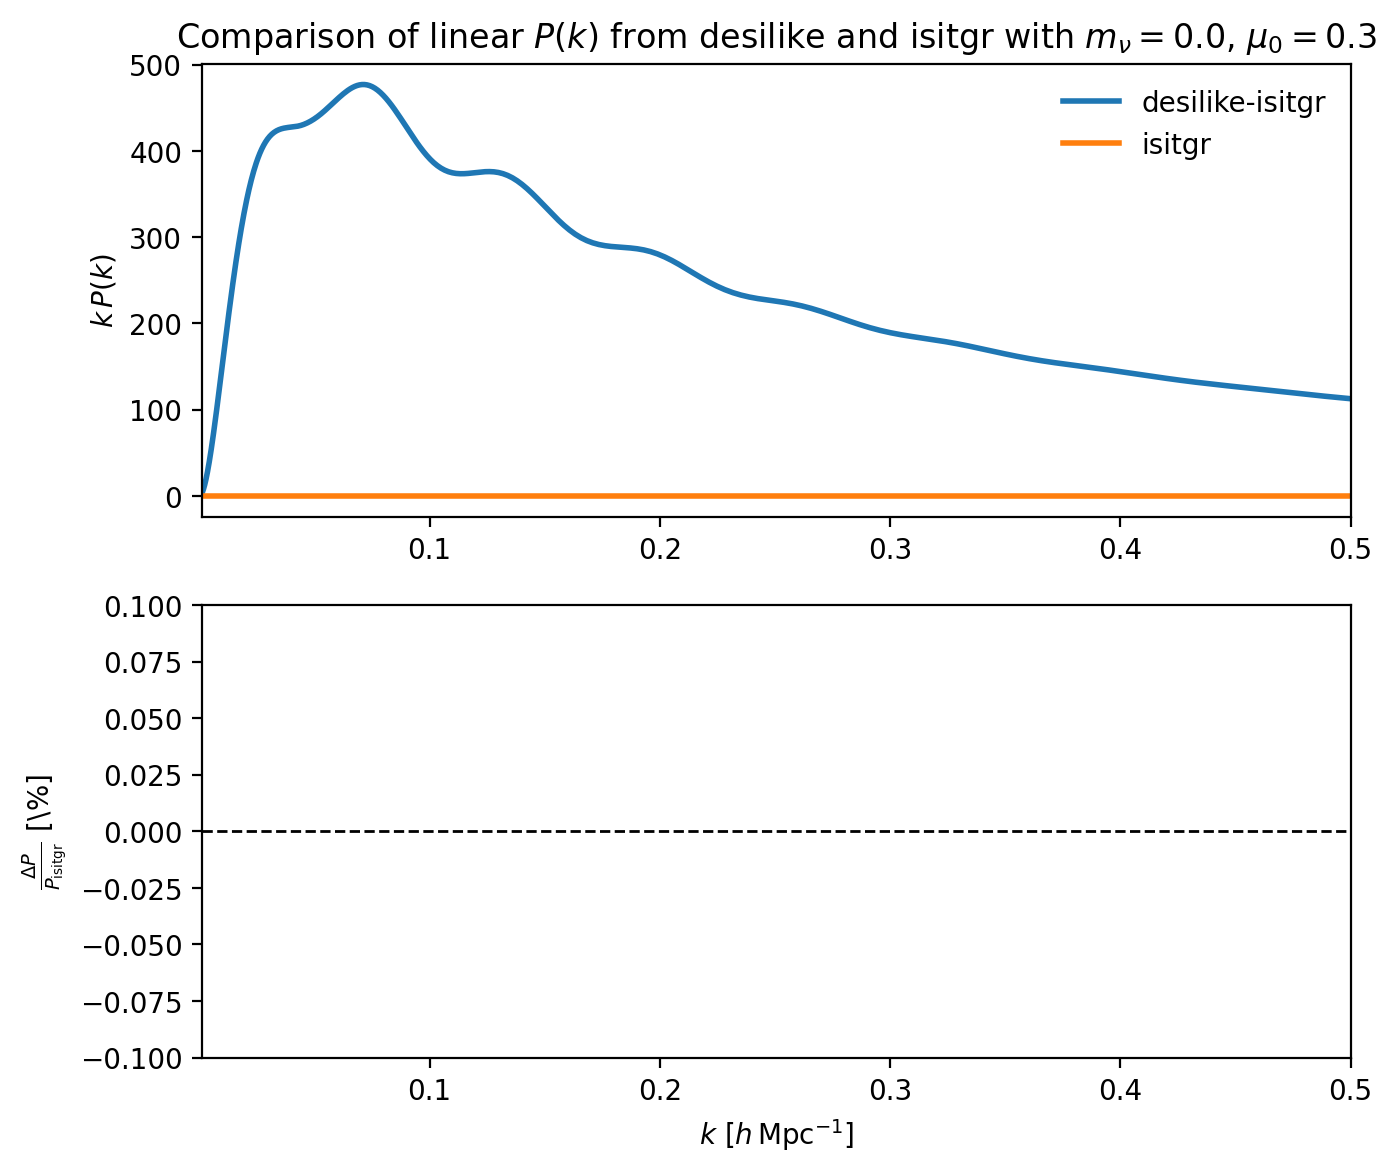

In [13]:
import matplotlib.pyplot as plt
import numpy as np
ks, pk_lin = k_isitgr, Pk

# print(ks,pk_lin*ks)
# ks=template.k
# pk_lin=template.pk_dd
template2()
# Compute P(k)
plt.figure(figsize=(7, 6))
# pk_mg = cosmo_mg.get_fourier().pk_interpolator().to_1d(z=z)
# --- First panel: P(k) ---
ax1 = plt.subplot(2, 1, 1)
ax1.plot(template2.k, template2.pk_dd * template2.k, label='desilike-isitgr', lw=2)
# ax1.plot(template2.k, pk_mg(template2.k) * template2.k, label='desilike-isitgr', lw=2)
ax1.plot(ks, ks * pk_lin, label='isitgr', lw=2)

# ax1.set_xlim(-0.5, 0.5)
ax1.set_ylabel(r'$k\,P(k)$')
ax1.legend(frameon=False)
ax1.set_title(r'Comparison of linear $P(k)$ from desilike and isitgr with $m_\nu=0.0$, $\mu_0=0.3$')

# --- Second panel: relative error ---
# Interpolate pyfkpt to desilike k-grid if needed
# pk_pyfkpt_interp = np.interp(template2.k, ks, pk_lin)
pk_pyfkpt_interp = np.interp(template2.k, ks, pk_lin)
# pk_pyfkpt_interp = pk_lin
rel_err = (template2.pk_dd - pk_pyfkpt_interp) / pk_pyfkpt_interp

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(template2.k, rel_err * 100, color='C3', lw=2)
ax2.axhline(0, color='k', ls='--', lw=1)

ax2.set_xlim(0.001, 0.5)
ax2.set_ylim(-0.1,0.1)
ax2.set_xlabel(r'$k \ [h\,\mathrm{Mpc}^{-1}]$')
ax2.set_ylabel(r'$\frac{\Delta P}{P_\mathrm{isitgr}}$ [\%]')
plt.savefig('lin_Pk_mu0.3.png',dpi=300)
plt.tight_layout()
plt.show()



Note: redshifts have been re-sorted (earliest first)
{'z': 0.3, 'Om': 0.3152926645318688, 'h': 0.6711, 'b1': 1.0, 'b2': 0.0, 'bs2': -0.0, 'b3nl': 0.0, 'alpha0': 0.0, 'alpha2': 0.0, 'alpha4': 0.0, 'ctilde': 0.0, 'PshotP': 10000.0, 'alpha0shot': 0.0, 'alpha2shot': 0.0, 'nquadSteps': 300, 'chatty': 0, 'model': 'HDKI', 'mg_variant': 'mu_OmDE', 'mu0': 0.0, 'kmin': 0.001, 'kmax': 0.29796546697616577, 'Nk': 50, 'rescale_PS': False, 'use_beyond_eds_kernels': False}
[0.001      0.00706052 0.01312104 0.01918156 0.02524208 0.0313026
 0.03736312 0.04342364 0.04948416 0.05554468 0.0616052  0.06766572
 0.07372624 0.07978676 0.08584728 0.0919078  0.09796832 0.10402884
 0.11008936 0.11614987 0.12221039 0.12827091 0.13433143 0.14039195
 0.14645247 0.15251299 0.15857351 0.16463403 0.17069455 0.17675507
 0.18281559 0.18887611 0.19493663 0.20099715 0.20705767 0.21311819
 0.21917871 0.22523923 0.23129975 0.23736027 0.24342079 0.24948131
 0.25554183 0.26160235 0.26766287 0.27372339 0.27978391 0.28584443
 0.

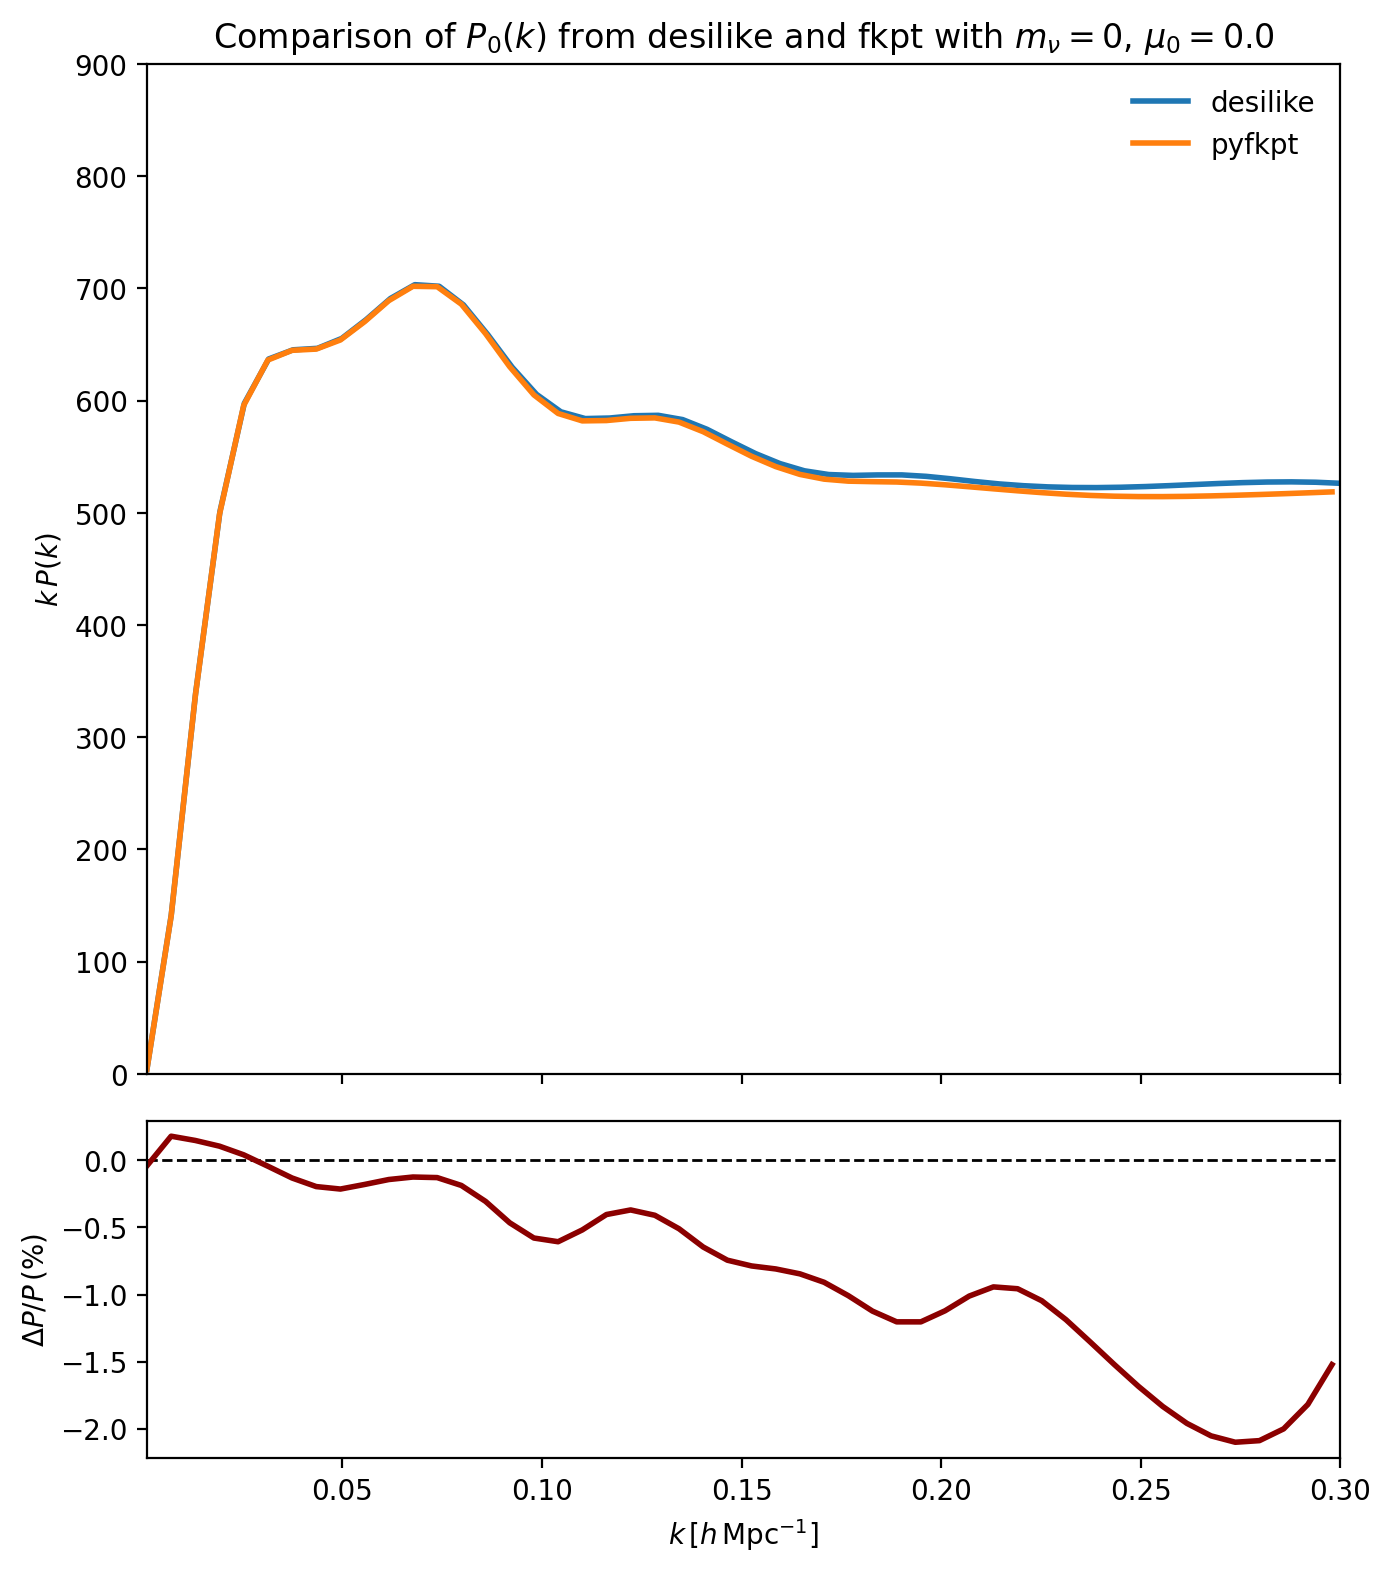

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Compute P(k)
kB, (P0E, P2E, P4E), (P0B, P2B, P4B) = compute_multipoles_pair(mu0=0.0)

# --- Setup figure with two panels ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# --- First panel: P(k) ---
ax1.plot(theory2.k, d * theory2.k, label='desilike', lw=2)
ax1.plot(kB, kB * P0E, label='pyfkpt', lw=2)
ax1.set_xlim(0.001, 0.3)
ax1.set_ylim(0, 900)
ax1.set_ylabel(r'$k\,P(k)$')
ax1.legend(frameon=False)
ax1.set_title(r'Comparison of $P_{0}(k)$ from desilike and fkpt with $m_\nu=0$, $\mu_0=0.0$')

# --- Second panel: Relative difference in % ---
# Interpolate desilike data to kB grid if necessary
P_interp = np.interp(kB, theory2.k, d)
rel_diff = 100 * (P0E - P_interp) / P_interp  # (% difference)

ax2.axhline(0, color='k', lw=1, ls='--')
ax2.plot(kB, rel_diff, color='darkred', lw=2)
ax2.set_xlim(0.001, 0.3)
ax2.set_ylabel(r'$\Delta P/P\,(\%)$')
ax2.set_xlabel(r'$k\,[h\,{\rm Mpc}^{-1}]$')
template2()
print(template2.f,template2.fk[0])
plt.tight_layout()
# plt.savefig("P0.png")
plt.show()


Omega_m: 0.3152926645318688
Note: redshifts have been re-sorted (earliest first)
{'z': 0.3, 'Om': 0.3152926645318688, 'h': 0.6711, 'b1': 1.0, 'b2': 0.0, 'bs2': -0.0, 'b3nl': 0.0, 'alpha0': 0.0, 'alpha2': 0.0, 'alpha4': 0.0, 'ctilde': 0.0, 'PshotP': 10000.0, 'alpha0shot': 0.0, 'alpha2shot': 0.0, 'nquadSteps': 300, 'chatty': 0, 'model': 'HDKI', 'mg_variant': 'mu_OmDE', 'mu0': 0.0, 'kmin': 0.001, 'kmax': 0.29796546697616577, 'Nk': 50, 'rescale_PS': False, 'use_beyond_eds_kernels': False}
[0.001      0.00706052 0.01312104 0.01918156 0.02524208 0.0313026
 0.03736312 0.04342364 0.04948416 0.05554468 0.0616052  0.06766572
 0.07372624 0.07978676 0.08584728 0.0919078  0.09796832 0.10402884
 0.11008936 0.11614987 0.12221039 0.12827091 0.13433143 0.14039195
 0.14645247 0.15251299 0.15857351 0.16463403 0.17069455 0.17675507
 0.18281559 0.18887611 0.19493663 0.20099715 0.20705767 0.21311819
 0.21917871 0.22523923 0.23129975 0.23736027 0.24342079 0.24948131
 0.25554183 0.26160235 0.26766287 0.273723

AssertionError: Power spectrum must have the same number of bins as the covariance matrix.

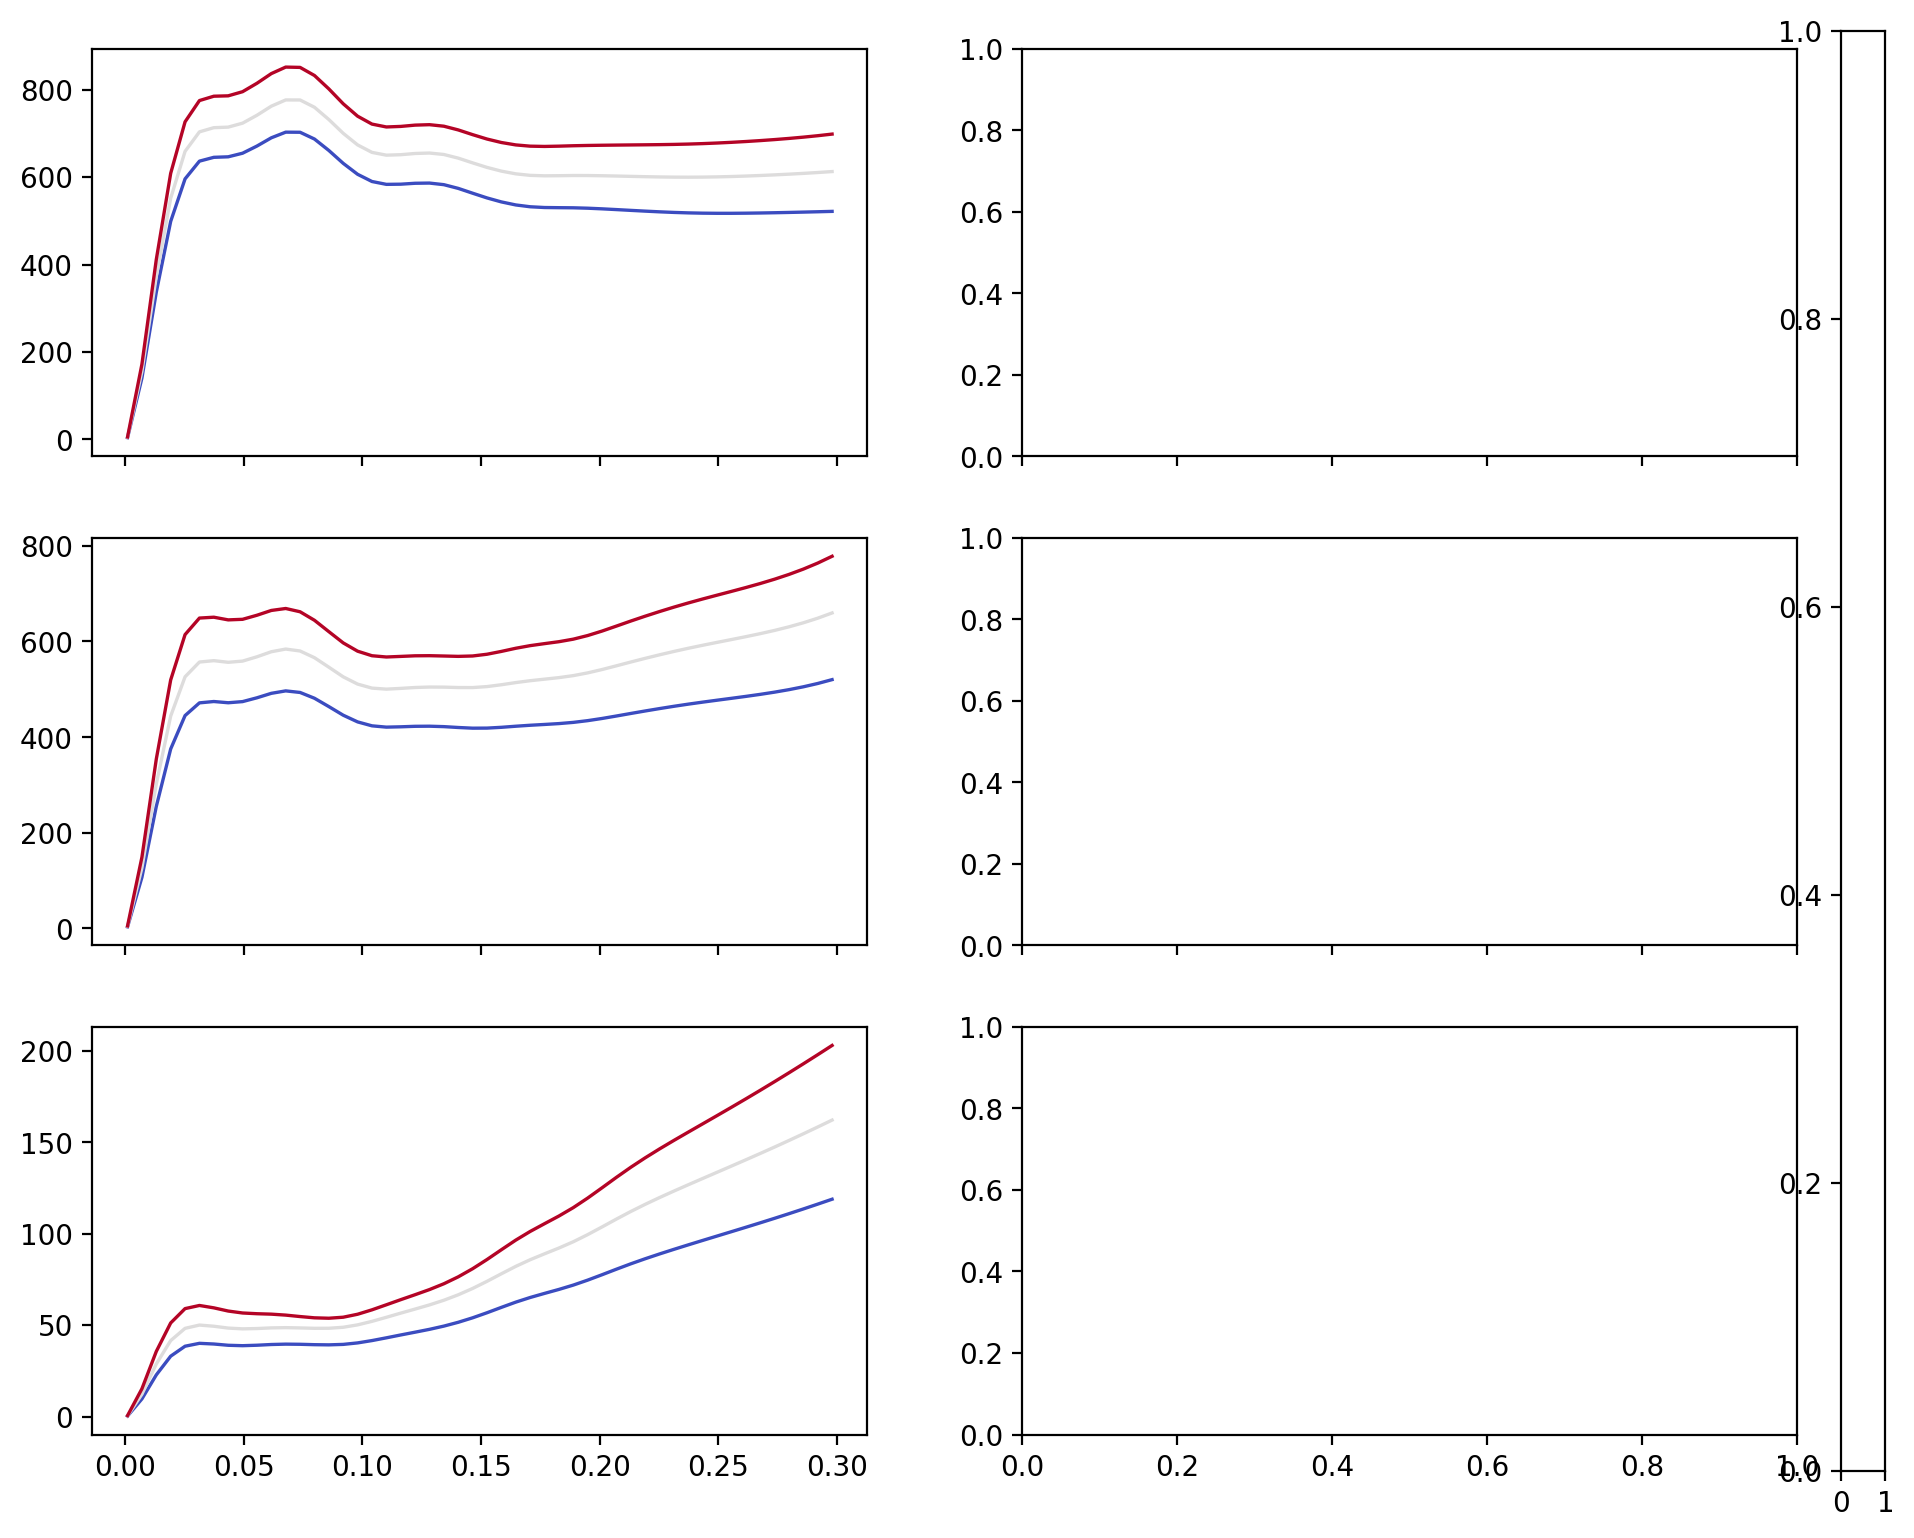

In [15]:
# 3×2 figure:
# col 0: absolute beyond-EdS multipoles (colored by μ0) + GR in black WITH ERROR BARS
# col 1: significance = (bEdS − EdS) / σ_GR per multipole (colored by μ0) + GR (zero line) in black

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy

# ---- pyfkpt (new fkpt wrapper) ----
import pyfkpt.rsd as pyfkpt

# ---- ISiTGR ----
import isitgr
from isitgr import model

# ---- thecov (Gaussian covariances of P_ell) ----
from thecov import geometry, covariance

# ==========================
# Configuration
# ==========================
h      = 0.6711
# h = 0.73
ombh2  = 0.022
omch2  = 0.12
omnuh2 = 0.00/93.14
As     = 2e-9
ns     = 0.965
z_pk   = 0.3

Om     = (ombh2 + omch2 + omnuh2) / (h**2)
print("Omega_m:", Om)

KMAX = 0.3
CAMB_KMAX = max(2.0, 16.0 * KMAX) * 1.25

# nuisance / bias
b1 = 1.70
b2 = -0.45
bs2  = -4/7*(b1 - 1)
b3nl = 32/315*(b1 - 1)
alpha0, alpha2, alpha4, ctilde = 3.0, -29.0, 0.0, 0.0
alpha0shot, alpha2shot, pshotp = 0.08, -8.0, 10000.0
nuis = [b1,b2,bs2,b3nl,alpha0,alpha2,alpha4,ctilde,alpha0shot,alpha2shot,pshotp]
nuis = [1,0,0,0,0,0,0,0,0,0,10000]

b1 = 1.0
b2 = 0.0
bs2  = -4/7 * (b1 - 1)
b3nl = 32/315 * (b1 - 1)
alpha0, alpha2, alpha4, ctilde = 0.0,0.0, 0.0, 0.0
alpha0shot, alpha2shot, pshotp = 0.0, 0.0, 10000.0


# μ0 sweep (include GR=0)
mu0_vals = np.linspace(0.0, 0.8, 3)

# mu0_vals = [0.0,0.0]

# BGS tracer settings for covariance
BGS_nbar   = 5.0e-4          # (h/Mpc)^3
BGS_volume = 2000.0**3       # (Mpc/h)^3   (i.e., (2 Gpc/h)^3 box)

# k-range to display / use for σ
KMIN_MASK = 0.01
KMAX_MASK = 0.20

base_common = dict(
    z=z_pk, Om=Om, h=h,
    b1=b1, b2=b2, bs2=bs2, b3nl=b3nl,
    alpha0=alpha0, alpha2=alpha2, alpha4=alpha4, ctilde=ctilde,
    PshotP=pshotp, alpha0shot=alpha0shot, alpha2shot=alpha2shot,
    nquadSteps=300, chatty=0,
    model="HDKI",
    mg_variant="mu_OmDE",
)

# ==========================
# Helper: return EdS & bEdS multipoles for given μ0
# ==========================
def compute_multipoles_pair(mu0,return_lin=False):
    # ---- ISiTGR params ----
    pars = isitgr.CAMBparams()
    pars.set_cosmology(H0=67.11, ombh2=0.022, omch2=0.12, mnu=0.00, omk=0, tau=0.0544, nnu=3.046,
                      MG_parameterization="muSigma", mu0=mu0)
    pars.InitPower.set_params(As=2.0e-9, ns=0.965, r=0)
    pars.set_accuracy(AccuracyBoost=1)
    pars.NonLinear = model.NonLinear_none

    # build a *local guarded* pad around z_pk so the central window always fits
    z_pad = model.redshift_padding(z_pk)

    # run once on the pad
    pars.set_matter_power(redshifts=z_pad, kmax=CAMB_KMAX)
    pars.NonLinear = model.NonLinear_none
    results = isitgr.get_results(pars)

    # linear P(k) and f(k) at zeff=z_pk
    PK, _, ks = results.get_matter_power_interpolator(
        nonlinear=False, hubble_units=True, k_hunit=True, return_z_k=True, silent=True
    )
    pk_lin = PK.P(z_pk, ks)
    if return_lin:
        return ks,pk_lin
    ks_fk, fzk = results.get_growth_rate(z_pk)
    fk_lin = fzk[0]                    # (Nk,)
    assert np.allclose(ks_fk, ks)      # same k-grid

    # cut to analysis k-range
    mask   = ks <= KMAX
    ks_cut = ks[mask]
    pk_cut = pk_lin[mask]
    fk_cut = fk_lin[mask]

    # small-k average for f0 (for tables that want a single number)
    smallk = ks_cut < 3e-3
    f0 = float(np.mean(fk_cut[smallk])) if np.any(smallk) else float(fk_cut[0])
    f0 = fk_cut[0]
    # FKPT evaluation grid
    base = dict(
        **base_common,
        mu0=mu0,
        kmin=float(max(1e-3, ks_cut.min())),
        kmax=float(min(ks_cut.max(), KMAX)),
        Nk=int(min(ks_cut.size, 50)),
    )
    k_eval = np.linspace(base["kmin"], base["kmax"], base["Nk"])

    # EdS kernels
    
    pE = deepcopy(base); pE["rescale_PS"]=False; pE["use_beyond_eds_kernels"]=False
    tE = pyfkpt.compute_multipoles(k=ks_cut, pk=pk_cut, fk=fk_cut, f0=f0, **pE)
    print(pE)
    kE, P0E, P2E, P4E = pyfkpt.rsd_multipoles(k=k_eval, nuis=nuis, z=z_pk, Om=Om, ap=False, tables=tE)
    print(kE)

    # beyond-EdS kernels
    pB = deepcopy(base); pB["rescale_PS"]=False; pB["use_beyond_eds_kernels"]=True
    
    tB = pyfkpt.compute_multipoles(k=ks_cut, pk=pk_cut, fk=fk_cut, f0=f0, **pB)
    kB, P0B, P2B, P4B = pyfkpt.rsd_multipoles(k=k_eval, nuis=nuis, z=z_pk, Om=Om, ap=False, tables=tB)

    assert np.allclose(kE, kB)
    return kB, (P0E, P2E, P4E), (P0B, P2B, P4B)

def interp_to_grid(k_src, y_src, k_target):
    # assumes k_src is increasing; if not, sort first
    return np.interp(k_target, k_src, y_src)

# ================= plot: 3×2 grid =================
plt.close('all')
fig, axes = plt.subplots(3, 2, figsize=(11, 9), sharex='col')
(ax0_abs, ax0_sig), (ax2_abs, ax2_sig), (ax4_abs, ax4_sig) = axes

# --- color map for μ0 sweep ---
cmap = plt.get_cmap('coolwarm')
norm = mpl.colors.Normalize(vmin=mu0_vals.min(), vmax=mu0_vals.max())
fig.subplots_adjust(right=0.90)
cax = fig.add_axes([0.92, 0.09, 0.02, 0.80])
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm); sm.set_array([])

k_for_cov = None
P0E_GR = P2E_GR = P4E_GR = None
P0B_GR = P2B_GR = P4B_GR = None

# ---------- sweep over μ0 (first pass to cache GR & draw absolute curves) ----------
for mu0 in mu0_vals:
    # print(mu0,k)
    k, (P0E, P2E, P4E), (P0B, P2B, P4B) = compute_multipoles_pair(mu0)
    color = cmap(norm(mu0))

    if mu0 == 0.0:
        k_for_cov = k.copy()
        P0E_GR, P2E_GR, P4E_GR = P0E.copy(), P2E.copy(), P4E.copy()
        P0B_GR, P2B_GR, P4B_GR = P0B.copy(), P2B.copy(), P4B.copy()

    # left column: absolute beyond-EdS k*Pℓ (colored by μ0)
    ax0_abs.plot(k, k*P0B, color=color, lw=1.2)
    ax2_abs.plot(k, k*P2B, color=color, lw=1.2)
    ax4_abs.plot(k, k*P4B, color=color, lw=1.2)

if k_for_cov is None:
    raise RuntimeError("No GR (mu0=0) case computed; can't build covariance.")

# ---------- build covariance from GR (BGS tracer) ----------
# Construct uniform edges from centers
Nk_full = k_for_cov.size
dk_full = (k_for_cov[-1] - k_for_cov[0]) / (Nk_full - 1)
kmin_edge_full = k_for_cov[0] - dk_full/2.0
kmax_edge_full = k_for_cov[-1] + dk_full/2.0

geom = geometry.BoxGeometry(volume=BGS_volume, nbar=BGS_nbar)
cov  = covariance.GaussianCovariance(geom)
cov.set_kbins(kmin=kmin_edge_full, kmax=kmax_edge_full, dk=dk_full)

# supply GR multipoles; mark monopole as including shot noise (since rsd_multipoles used shot-noise nuisances)
cov.set_galaxy_pk_multipole(P0B_GR, ell=0, has_shotnoise=True)
cov.set_galaxy_pk_multipole(P2B_GR, ell=2)
cov.set_galaxy_pk_multipole(P4B_GR, ell=4)
cov.compute_covariance()

# extract diagonal errors per multipole from the stacked covariance:
diag_full = np.sqrt(np.diag(cov.cov))
sig0_full = diag_full[0:Nk_full]
sig2_full = diag_full[Nk_full:2*Nk_full]
sig4_full = diag_full[2*Nk_full:3*Nk_full]

# ---------- apply k mask consistently ----------
mask_cov = (k_for_cov > KMIN_MASK) & (k_for_cov < KMAX_MASK)

k_for_cov = k_for_cov[mask_cov]
P0B_GR = P0B_GR[mask_cov]; P2B_GR = P2B_GR[mask_cov]; P4B_GR = P4B_GR[mask_cov]
P0E_GR = P0E_GR[mask_cov]; P2E_GR = P2E_GR[mask_cov]; P4E_GR = P4E_GR[mask_cov]
sig0_GR = sig0_full[mask_cov]; sig2_GR = sig2_full[mask_cov]; sig4_GR = sig4_full[mask_cov]

# ---------- overplot GR (black) with error bars on abs column ----------
ax0_abs.errorbar(k_for_cov, k_for_cov*P0B_GR, yerr=k_for_cov*sig0_GR, fmt='-', color='k', lw=1.8, capsize=0)
ax2_abs.errorbar(k_for_cov, k_for_cov*P2B_GR, yerr=k_for_cov*sig2_GR, fmt='-', color='k', lw=1.8, capsize=0)
ax4_abs.errorbar(k_for_cov, k_for_cov*P4B_GR, yerr=k_for_cov*sig4_GR, fmt='-', color='k', lw=1.8, capsize=0)

# ---------- recompute sweep to plot significance in right column (interpolate to masked cov grid) ----------
for mu0 in mu0_vals:
    k, (P0E, P2E, P4E), (P0B, P2B, P4B) = compute_multipoles_pair(mu0)
    kfkpt=k
    color = cmap(norm(mu0))

    d0 = P0B - P0E
    d2 = P2B - P2E
    d4 = P4B - P4E

    d0_on_cov = interp_to_grid(k, d0, k_for_cov)
    d2_on_cov = interp_to_grid(k, d2, k_for_cov)
    d4_on_cov = interp_to_grid(k, d4, k_for_cov)

    s0 = d0_on_cov / sig0_GR
    s2 = d2_on_cov / sig2_GR
    s4 = d4_on_cov / sig4_GR

    ax0_sig.plot(k_for_cov, s0, color=color, lw=1.2)
    ax2_sig.plot(k_for_cov, s2, color=color, lw=1.2)
    ax4_sig.plot(k_for_cov, s4, color=color, lw=1.2)

# GR reference line (zero significance) in black
ax0_sig.plot(k_for_cov, np.zeros_like(k_for_cov), color='k', lw=1.8)
ax2_sig.plot(k_for_cov, np.zeros_like(k_for_cov), color='k', lw=1.8)
ax4_sig.plot(k_for_cov, np.zeros_like(k_for_cov), color='k', lw=1.8)

# ----- styling -----
# col 0: absolute (with GR + error bars); note y is k * P_ell
for ax, lab in zip([ax0_abs, ax2_abs, ax4_abs],
                   [r"$k\,P_0(k)$", r"$k\,P_2(k)$", r"$k\,P_4(k)$"]):
    ax.grid(True, alpha=0.25)
    ax.set_ylabel(lab)

# col 1: significance (bEdS − EdS)/σ_GR
for ax, lab in zip([ax0_sig, ax2_sig, ax4_sig],
                   [r"$(P_0^{\rm bEdS}-P_0^{\rm EdS})/\sigma_0^{\rm GR}$",
                    r"$(P_2^{\rm bEdS}-P_2^{\rm EdS})/\sigma_2^{\rm GR}$",
                    r"$(P_4^{\rm bEdS}-P_4^{\rm EdS})/\sigma_4^{\rm GR}$"]):
    ax.axhline(0, color='k', lw=1.0, alpha=0.5)
    ax.grid(True, alpha=0.15)
    ax.set_ylabel(lab)

# x limits & labels
for col in range(2):
    for ax in axes[:, col]:
        ax.set_xlim(k_for_cov[0], k_for_cov[-1])
for ax in axes[-1, :]:
    ax.set_xlabel(r"$k\,[h\,\mathrm{Mpc}^{-1}]$")

# titles
axes[0,0].set_title("Absolute bEdS (colored by $\\mu_0$) + GR with errors (BGS)", fontsize=12)
axes[0,1].set_title("(bEdS − EdS) / $\\sigma^{\\rm GR}$ (BGS)", fontsize=12)

# colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label(r'$\mu_0$')

fig.suptitle(fr"Multipoles at $z={z_pk}$; $\Omega_m={Om:.3f}$  — BGS covariance (Gaussian, box)", y=0.98)
plt.tight_layout(rect=[0, 0, 0.90, 0.96])
plt.show()

In [31]:
ks,Pk=compute_multipoles_pair(mu0,return_lin=True)

Note: redshifts have been re-sorted (earliest first)


In [32]:
pars = isitgr.CAMBparams()
pars.set_cosmology(H0=67.11, ombh2=0.022, omch2=0.12, mnu=0.06, omk=0, tau=0.0544, nnu=3.046,
                  MG_parameterization="muSigma", mu0=0.0)
pars.InitPower.set_params(As=2.0e-9, ns=0.965, r=0)
pars.set_accuracy(AccuracyBoost=2)
pars.NonLinear = model.NonLinear_none
z=0.3
pars.set_matter_power(redshifts=[z], kmax=2)
results = isitgr.get_results(pars)
k, _, Pk = results.get_matter_power_spectrum(minkh=0.001, maxkh=2, npoints=200)
Pk = Pk[0]

array([1.05524823e-05, 1.16522251e-05, 1.28665797e-05, 1.42074896e-05,
       1.56881451e-05, 1.73231092e-05, 1.91284635e-05, 2.11219649e-05,
       2.33232222e-05, 2.57538868e-05, 2.84378675e-05, 3.14015633e-05,
       3.46741217e-05, 3.82877406e-05, 4.22779558e-05, 4.66840138e-05,
       5.15492611e-05, 5.69215445e-05, 6.28537091e-05, 6.94041009e-05,
       7.66371595e-05, 8.46240146e-05, 9.34432319e-05, 1.03181563e-04,
       1.13934788e-04, 1.25808670e-04, 1.38920019e-04, 1.53397777e-04,
       1.69384351e-04, 1.87037003e-04, 2.06529337e-04, 2.28053104e-04,
       2.51820020e-04, 2.78063817e-04, 3.07042646e-04, 3.39041580e-04,
       3.74375290e-04, 4.13391390e-04, 4.56473586e-04, 5.04045689e-04,
       5.56575542e-04, 6.14579942e-04, 6.78629323e-04, 7.49353669e-04,
       8.27448734e-04, 9.13682510e-04, 1.00890337e-03, 1.11404771e-03,
       1.23014988e-03, 1.35835179e-03, 1.49991456e-03, 1.65623042e-03,
       1.82883698e-03, 2.01943191e-03, 2.22989009e-03, 2.46228138e-03,
      

In [31]:
P0E_GR

array([25368.55275211, 25821.87628611, 23567.09866409, 20391.56292268,
       17378.45277862, 15007.00243474, 13339.77760156, 12178.52811368,
       11286.90136214, 10473.49890345,  9622.60219111,  8711.20747761,
        7801.57312543,  6969.94375293,  6279.86582986,  5748.48338399,
        5365.76100362,  5084.37195919,  4847.50707736,  4622.84466225,
        4389.760046  ,  4143.12509771,  3899.44290054,  3675.22399476,
        3476.91711539,  3305.54935869,  3161.90777363,  3041.67791361,
        2937.22713474,  2841.13259154,  2748.88310577])